In [8]:
import json
import statistics

def count_strokes_in_drawing(drawing):
    # Each stroke is a list within the 'drawing' list, so just return the length of the list
    return len(drawing)

def find_median_strokes_with_key_id(file_path):
    stroke_counts = []
    drawing_data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            drawing_data = json.loads(line)
            stroke_count = count_strokes_in_drawing(drawing_data['drawing'])
            stroke_counts.append(stroke_count)
            drawing_data_list.append(drawing_data)

    median_strokes = statistics.median(stroke_counts)

    # Find a drawing that matches the median number of strokes
    for drawing_data in drawing_data_list:
        if count_strokes_in_drawing(drawing_data['drawing']) == median_strokes:
            return median_strokes, drawing_data['key_id']

    return median_strokes, None

# Replace 'path_to_file.ndjson' with your file path
file_path = 'full_simplified_house.ndjson'
median_strokes, median_strokes_key_id = find_median_strokes_with_key_id(file_path)

if median_strokes_key_id:
    print(f"The drawing with the median number of strokes ({median_strokes}) has key_id: {median_strokes_key_id}")
else:
    print("No drawing found with the median number of strokes.")






The drawing with the median number of strokes (3.0) has key_id: 6190295400054784


In [13]:
import json
import statistics

def count_strokes_in_drawing(drawing):
    return len(drawing)

def find_closest_to_mean_strokes_with_key_id(file_path):
    stroke_counts = []
    drawing_data_list = []

    with open(file_path, 'r') as file:
        for line in file:
            drawing_data = json.loads(line)
            stroke_count = count_strokes_in_drawing(drawing_data['drawing'])
            stroke_counts.append(stroke_count)
            drawing_data_list.append(drawing_data)

    mean_strokes = statistics.mean(stroke_counts)

    # Find the drawing closest to the mean number of strokes
    closest_strokes = None
    closest_strokes_key_id = None
    for drawing_data in drawing_data_list:
        if closest_strokes is None or abs(count_strokes_in_drawing(drawing_data['drawing']) - mean_strokes) < abs(closest_strokes - mean_strokes):
            closest_strokes = count_strokes_in_drawing(drawing_data['drawing'])
            closest_strokes_key_id = drawing_data['key_id']

    return mean_strokes, closest_strokes_key_id

# Replace 'path_to_file.ndjson' with your file path
file_path_house = 'full_simplified_house.ndjson'
file_path_mona = 'full_simplified_The Mona Lisa.ndjson'
mean_strokes_house, closest_strokes_key_id_house = find_closest_to_mean_strokes_with_key_id(file_path_house)
mean_strokes_mona, closest_strokes_key_id_mona = find_closest_to_mean_strokes_with_key_id(file_path_mona)

print(f"The drawing closest to the mean number of strokes ({mean_strokes_house}) has key_id: {closest_strokes_key_id_house}")
print(f"The drawing closest to the mean number of strokes ({mean_strokes_mona}) has key_id: {closest_strokes_key_id_mona}")

The drawing closest to the mean number of strokes (3.722300989514104) has key_id: 5372917690925056
The drawing closest to the mean number of strokes (8.789138511982733) has key_id: 5365386180558848


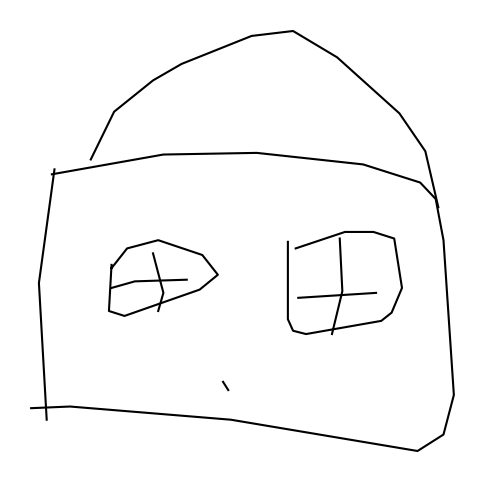

The first drawing with 10 strokes has key_id: 6182756776148992


In [12]:
import json
import matplotlib.pyplot as plt

def plot_drawing(drawing):
    plt.figure(figsize=(6, 6))
    for stroke in drawing:
        plt.plot(stroke[0], [-y for y in stroke[1]], color='black')  # Negating y to flip the drawing
    plt.axis('off')
    plt.show()

def find_and_plot_first_drawing_with_strokes(file_path, target_strokes):
    with open(file_path, 'r') as file:
        for line in file:
            drawing_data = json.loads(line)
            if len(drawing_data['drawing']) == target_strokes:
                plot_drawing(drawing_data['drawing'])
                return drawing_data['key_id']
    return None

# Replace 'path_to_file.ndjson' with your file path
file_path = 'full_simplified_house.ndjson'
target_strokes = 10  # Number of strokes to find
key_id = find_and_plot_first_drawing_with_strokes(file_path, target_strokes)

if key_id:
    print(f"The first drawing with {target_strokes} strokes has key_id: {key_id}")
else:
    print(f"No drawing found with exactly {target_strokes} strokes.")
